# Imports and packages

In [2]:
pip install emoji==1.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5d01e4ec64acad0111163f7fff44d20fe7b89b6e106f5891e6df317d19849658
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.1.0
    Uninstalling emoji-2.1.0:
      Successfully uninstalled emoji-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install keras

In [4]:
!pip install nltk

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
import pandas as pd
import numpy as np
import random

from emoji import UNICODE_EMOJI

import tensorflow as tf
import keras.api._v2.keras as keras
from keras.preprocessing.text import one_hot

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-11-27 17:24:51.866726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 17:24:51.961578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 17:24:51.962358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Base de treino - classificado

In [8]:
df_train = pd.read_feather('/kaggle/input/big-dataset/big_train_dataset.feather')
df_val = pd.read_feather('/kaggle/input/big-dataset/big_val_dataset.feather')
df_test = pd.read_feather('/kaggle/input/big-dataset/big_test_dataset.feather')

display(df_train)
display(df_val)
display(df_test)

,index,text,label
0,0,@9s_Watch @FuckChina721831 @MOFA_Taiwan @WHO T...,0.0
1,1,"IF THIS GOES ANY FURTHER, WITH CORONA VIRUS; T...",0.0
2,2,BBC News - Coronavirus : South Korean sect ide...,1.0
3,3,Unique ordeal': Wuhan evacuees head home after...,1.0
4,4,"Salam, kmss ada group support tak for ladies? ...",1.0
...,...,...,...
1167510,999333,chink boi wna walk,0.0
1167511,999334,what the fuckkkkkk ? ? ? ? ? ? . . . how can i...,0.0
1167512,999336,damn covid .,0.0
1167513,999340,"hey jack ma . the entire world mess ""chinese v...",0.0


,index,text,label
0,0,@cfyneufx123 @kpru This mongoloid came to kill...,0.0
1,1,"Holy shit, based ching chong alert. 🚨 https://...",0.0
2,2,The MSM gives you disinfectants that MAY kill ...,1.0
3,3,"No kiss, No hug #coronavirus",1.0
4,4,@parasocialanxi1 Don't feel bad if it's the na...,1.0
...,...,...,...
145933,93887,chinese people recently kills baluchistan libe...,1.0
145934,7292,i suspects evans may 're get give monkey scrub...,1.0
145935,592046,exfuckingcuse,0.0
145936,774781,three college-age cousins covid . so that’s fu...,1.0


,index,text,label
0,0,Coronavirus Election Puts the Democrats In a D...,0.0
1,1,🦠🦠☠️☠️ You are a poor ghost from: Kenya. Nigg...,0.0
2,2,The President of the US calling COVID-19 the ‘...,0.0
3,3,@NortherntreeY @Lyndsayunihead @sarahgrowls @r...,0.0
4,4,"At the very least, China needs to be isolated...",0.0
...,...,...,...
145935,17901,we because never levels. even japanese wagyu h...,1.0
145936,167333,asian problems : non-asian friends asks transl...,1.0
145937,747222,amazing learn work . a colleague told avoid an...,1.0
145938,36361,2021 global travel forecast : what impact will...,1.0


In [9]:
from sklearn.utils import shuffle
display(df_val)

df_train = shuffle(df_train)
df_val = shuffle(df_val)
df_test = shuffle(df_test)

display(df_val)

,index,text,label
0,0,@cfyneufx123 @kpru This mongoloid came to kill...,0.0
1,1,"Holy shit, based ching chong alert. 🚨 https://...",0.0
2,2,The MSM gives you disinfectants that MAY kill ...,1.0
3,3,"No kiss, No hug #coronavirus",1.0
4,4,@parasocialanxi1 Don't feel bad if it's the na...,1.0
...,...,...,...
145933,93887,chinese people recently kills baluchistan libe...,1.0
145934,7292,i suspects evans may 're get give monkey scrub...,1.0
145935,592046,exfuckingcuse,0.0
145936,774781,three college-age cousins covid . so that’s fu...,1.0


,index,text,label
45873,44315,are correspondents slick 😒 n't made lipinski h...,1.0
48225,460292,this poor girl .,1.0
42711,455771,the cheeeeeeeeeeek fuckers,0.0
99660,55584,southwest asian abrosexual endergender people ...,1.0
14705,333025,my dink dink watchin tiktok wit ova laughin li...,0.0
...,...,...,...
49419,423029,p . . one group claiming licensed mental healt...,1.0
98436,24733,japanese oligarchs go week allow people freedo...,1.0
97015,314764,fuckkk why i just found this tweet recently sh...,0.0
142146,36206,me mother big - time. she wristwatches lot doc...,1.0


In [10]:
train_y = df_train['label']
train_x = df_train['text']

val_y = df_val['label']
val_x = df_val['text']

test_y = df_test['label']
test_x = df_test['text']

# Dataprep

In [11]:
stopwords_set.add('\u200d')
stopwords_set.add(' ')

In [12]:
def removeMention(tweet):
    words = tweet.split()
    words = [word for word in words if "@" not in word ]
    newTweet = ' '.join(words)
    return newTweet

  # substituir menção por <USER>

# search your emoji
def is_emoji(s, language="en"):
    return s in UNICODE_EMOJI[language]

# add space near your emoji
def add_space(text):
    return ''.join(' ' + char + ' ' if is_emoji(char) else char for char in text).strip()

def separateEmoji(tweet):
    return add_space(tweet)

import re
regex = re.compile("(http://t\.co.{12})|(https://t\.co.{11})")

def removeLink(tweet):
    #words = tweet.split()
    #links = [word for word in words if "t.co" in word]
    words = regex.sub('',tweet)
    return words

def splitPunctuation(tweet):
    tweet = tweet.replace(".", " . ").replace(",", " , ").replace(";", " ; ")\
        .replace("!", " ! ").replace("?", " ? ").replace(":", " : ")\
        .replace("(", " ( ").replace(")", " ) ")
    return tweet

def remove_stopwords(tweet):
    words = tweet.split()
    words = [word for word in words if not word in stopwords_set]
    newTweet = ' '.join(words)
    return newTweet

def lower_tweet(tweet):
    return tweet.lower()

In [ ]:
train_x = train_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))
val_x = val_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))
test_x = test_x.apply(lambda x:separateEmoji(x)).apply(lambda x:removeMention(x)).apply(lambda x:removeLink(x)).apply(lambda x:splitPunctuation(x)).apply(lambda x: x.lower()).apply(lambda x:remove_stopwords(x))

train_x.head()

display(train_y.value_counts())

# CNN


In [ ]:
from keras.preprocessing.text import Tokenizer           

num_words = 5000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_x)

train_x_tokenized = tokenizer.texts_to_sequences(train_x)
test_x_tokenized = tokenizer.texts_to_sequences(test_x)
val_x_tokenized = tokenizer.texts_to_sequences(val_x)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import keras
from keras_preprocessing.sequence import pad_sequences

max_length = 280
train_x_padded = pad_sequences(train_x_tokenized, maxlen=max_length, padding='post')
test_x_padded = pad_sequences(test_x_tokenized, maxlen=max_length, padding='post')
val_x_padded = pad_sequences(val_x_tokenized, maxlen=max_length, padding='post')


In [ ]:
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D, Dropout
from keras.models import Sequential

def create_model():
    model = Sequential()

    model.add(Embedding(num_words, 100, input_length=max_length))
    model.add(Conv1D(max_length, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss="binary_crossentropy",loss_weights=[1.5, 0.75], metrics=['mse', 'accuracy'])

    return model

In [ ]:
model = create_model()
model.summary()

In [19]:
import tensorflow as tf
import os

checkpoint_path =  "training_ckpts/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 # verbose=1
                                                 )

with tf.device('/GPU:0'):
    # Train the model with the new callback
    history = model.fit(x=train_x_padded,
              y=train_y,
              epochs=50,
              validation_data=(val_x_padded, val_y),
              batch_size=256,
              callbacks=[cp_callback])  # Pass callback to training


4561/4561 [==============================] - ETA: 0s - loss: 0.3197 - mse: 0.0632 - accuracy: 0.9150

2022-11-27 17:32:40.391525: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 163450560 exceeds 10% of free system memory.


4561/4561 [==============================] - 125s 26ms/step - loss: 0.3197 - mse: 0.0632 - accuracy: 0.9150 - val_loss: 0.2609 - val_mse: 0.0504 - val_accuracy: 0.9332
Epoch 2/50
4561/4561 [==============================] - 117s 26ms/step - loss: 0.2550 - mse: 0.0492 - accuracy: 0.9347 - val_loss: 0.2504 - val_mse: 0.0486 - val_accuracy: 0.9353
Epoch 3/50
4561/4561 [==============================] - 117s 26ms/step - loss: 0.2453 - mse: 0.0474 - accuracy: 0.9370 - val_loss: 0.2442 - val_mse: 0.0474 - val_accuracy: 0.9363
Epoch 4/50
4561/4561 [==============================] - 117s 26ms/step - loss: 0.2377 - mse: 0.0459 - accuracy: 0.9388 - val_loss: 0.2400 - val_mse: 0.0466 - val_accuracy: 0.9373
Epoch 5/50
4561/4561 [==============================] - 117s 26ms/step - loss: 0.2301 - mse: 0.0445 - accuracy: 0.9407 - val_loss: 0.2368 - val_mse: 0.0460 - val_accuracy: 0.9385
Epoch 6/50
4561/4561 [==============================] - 117s 26ms/step - loss: 0.2231 - mse: 0.0431 - accuracy: 0.94

In [21]:
history.history.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=[i for i in range(50)], y=val_loss,
                    mode='lines+markers',
                    name='loss'))
fig.add_trace(go.Scatter(x=[i for i in range(50)], y=val_acc,
                    mode='lines+markers',
                    name='acurácia'))
fig.update_layout(
    title="Treinamento do CNN ao longo das épocas",
    xaxis_title="Épocas",
)
fig.show()

In [24]:
model = create_model()
model.load_weights('/kaggle/working/training_ckpts/cp-0011.ckpt')

In [25]:
loss, mse, accuracy = model.evaluate(test_x_padded,test_y,batch_size=256)
y_pred = model.predict(test_x_padded)
print('Testing Accuracy is {} '.format(accuracy*100))

2022-11-27 19:15:39.711968: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 163452800 exceeds 10% of free system memory.


571/571 [==============================] - 5s 8ms/step - loss: 0.2373 - mse: 0.0457 - accuracy: 0.9390


2022-11-27 19:15:44.495165: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 163452800 exceeds 10% of free system memory.


Testing Accuracy is 93.89954805374146 


In [27]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

print("f1: ", f1_score(test_y, np.where(y_pred < 0.5, 0, 1), pos_label=0))
print("recall: ", recall_score(test_y, np.where(y_pred < 0.5, 0, 1), pos_label=0))
print("precision: ", precision_score(test_y, np.where(y_pred < 0.5, 0, 1), pos_label=0))
print("accuracy: ", accuracy_score(test_y, np.where(y_pred < 0.5, 0, 1)))

f1:  0.9070075935616625
recall:  0.893062097620174
precision:  0.9213955265056661
accuracy:  0.9389954775935316


In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(precision_recall_fscore_support(test_y, np.where(y_pred < 0.5, 0, 1), average='binary', pos_label=0))
print(confusion_matrix(test_y, np.where(y_pred < 0.5, 0, 1)))
print(classification_report(test_y, np.where(y_pred < 0.5, 0, 1)))


(0.9213955265056661, 0.893062097620174, 0.9070075935616625, None)
[[43418  5199]
 [ 3704 93619]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     48617
         1.0       0.95      0.96      0.95     97323

    accuracy                           0.94    145940
   macro avg       0.93      0.93      0.93    145940
weighted avg       0.94      0.94      0.94    145940



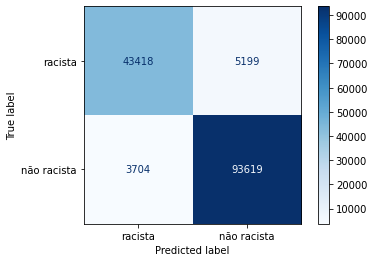

In [29]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(test_y, np.where(y_pred < 0.5, 0, 1)), display_labels=['racista','não racista'])
disp.plot(cmap='Blues')
plt.show()